#**based on exam 1 and exam 2 we will predict he/she will get admission in college**

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
#loading data set
data=np.loadtxt('ex2data1.txt',delimiter=',')

In [5]:
data


array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ],
       [95.86155507, 38.22527806,  0.        ],
       [75.01365839, 30.60326323,  0.        ],
       [82.30705337, 76.4819633 ,  1.        ],
       [69.36458876, 97.71869196,  1.        ],
       [39.53833914, 76.03681085,  0.        ],
       [53.97105215, 89.20735014,  1.        ],
       [69.07014406, 52.74046973,  1.        ],
       [67.94685548, 46.67857411,  0.        ],
       [70.66150955, 92.92713789,  1.        ],
       [76.97878373, 47.57596365,  1.        ],
       [67.37202755, 42.83843832,  0.   

In [6]:
x=data[:,0:2]
y=data[:,2:3]

In [7]:
x.shape

(100, 2)

In [8]:
y.shape

(100, 1)

In [9]:
get_admission=np.where(y==1)
no_admission=np.where(y==0)

In [10]:
get_admission

(array([ 3,  4,  6,  7,  8,  9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26, 30,
        31, 33, 37, 40, 42, 46, 47, 48, 49, 50, 51, 52, 56, 58, 59, 60, 66,
        68, 69, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 87, 88,
        90, 91, 93, 94, 95, 96, 97, 98, 99], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [11]:
no_admission

(array([ 0,  1,  2,  5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32, 34, 35,
        36, 38, 39, 41, 43, 44, 45, 53, 54, 55, 57, 61, 62, 63, 64, 65, 67,
        70, 78, 79, 86, 89, 92], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

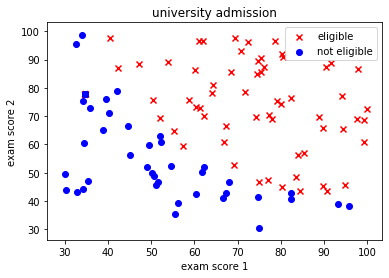

In [13]:
plt.scatter(x[get_admission,0],x[get_admission,1],label='eligible',c='r',marker='x')
plt.scatter(x[no_admission,0],x[no_admission,1],label='not eligible',c='b',marker='o')
plt.title("university admission")
plt.xlabel("exam score 1")
plt.ylabel("exam score 2")
plt.legend()
plt.show()

In [14]:
#splitting the data into train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [15]:
x_train.shape

(80, 2)

In [16]:
x_test.shape

(20, 2)

In [17]:
# call the algorithm
k=LogisticRegression()

In [19]:
#fit method to load the train data into the called algorithm
k.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred=k.predict(x_test)
y_pred

array([1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1.])

In [22]:
y_test.reshape(1,20)

array([[1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
        0., 1., 1., 1.]])

In [23]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.95

In [25]:
# check for the new data
x_n=np.array([[45,75]])
y_n=k.predict(x_n)
print('for a student with scre 45 and 85, we predict an admission probability of:',y_n)



for a student with scre 45 and 85, we predict an admission probability of: [1.]


In [26]:
x

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,